# MANUAL NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [7]:
Mild = r'C:\Users\Admin\Pictures\Phase 2\dataset\train\Mild'
Moderate = r'C:\Users\Admin\Pictures\Phase 2\dataset\train\Moderate'
No_DR = r'C:\Users\Admin\Pictures\Phase 2\dataset\train\No_DR'
Proliferate_DR = r'C:\Users\Admin\Pictures\Phase 2\dataset\train\Proliferate_DR'
Severe = r'C:\Users\Admin\Pictures\Phase 2\dataset\train\Severe'

In [8]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR Mild:

======== Images in:  C:\Users\Admin\Pictures\Phase 2\dataset\train\Mild
Images_count :	 200
Min_width :	 224
Max_width :	 224
Min_height :	 224
Max_height :	 224



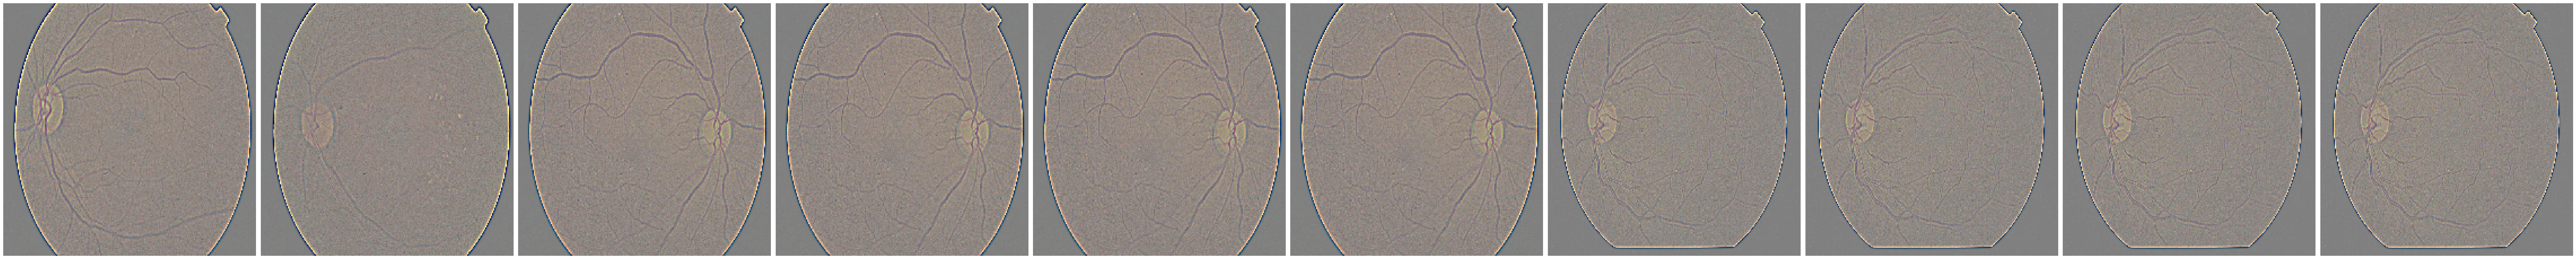

In [9]:
print("")
print("TRAINING DATA FOR Mild:")
print("")
images_details(Mild)
print("")
plot_images(Mild, 10)


TRAINING DATA FOR Moderate:

======== Images in:  C:\Users\Admin\Pictures\Phase 2\dataset\train\Moderate
Images_count :	 200
Min_width :	 224
Max_width :	 224
Min_height :	 224
Max_height :	 224



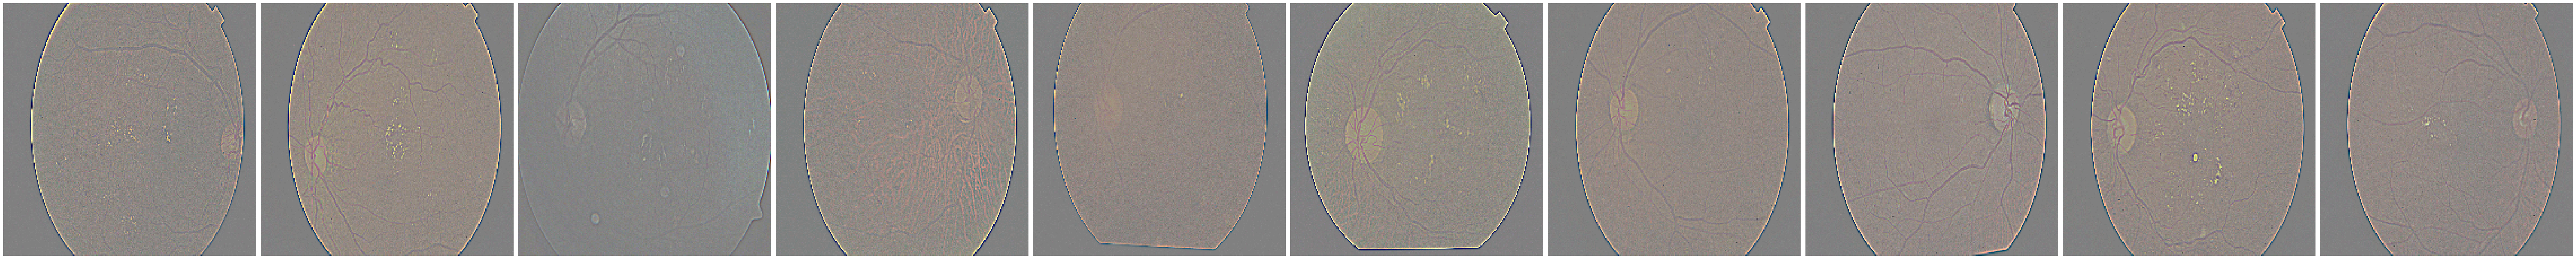

In [10]:
print("")
print("TRAINING DATA FOR Moderate:")
print("")
images_details(Moderate)
print("")
plot_images(Moderate, 10)


TRAINING DATA FOR No_DR:

======== Images in:  C:\Users\Admin\Pictures\Phase 2\dataset\train\No_DR
Images_count :	 200
Min_width :	 224
Max_width :	 224
Min_height :	 224
Max_height :	 224



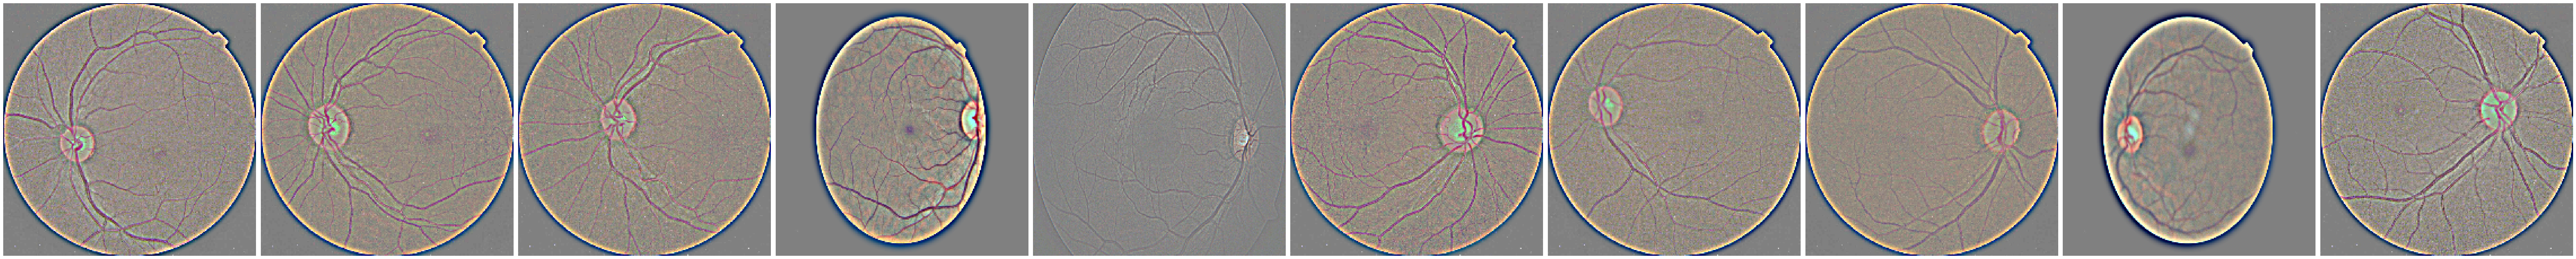

In [11]:
print("")
print("TRAINING DATA FOR No_DR:")
print("")
images_details(No_DR)
print("")
plot_images(No_DR, 10)


TRAINING DATA FOR Proliferate_DR:

======== Images in:  C:\Users\Admin\Pictures\Phase 2\dataset\train\Proliferate_DR
Images_count :	 172
Min_width :	 224
Max_width :	 224
Min_height :	 224
Max_height :	 224



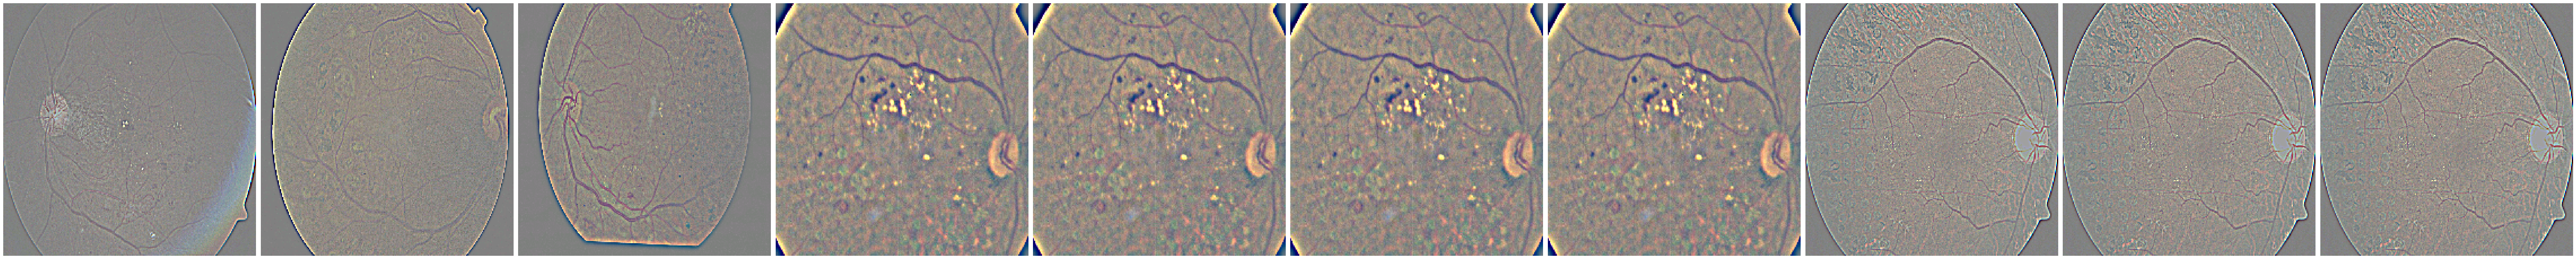

In [12]:
print("")
print("TRAINING DATA FOR Proliferate_DR:")
print("")
images_details(Proliferate_DR)
print("")
plot_images(Proliferate_DR, 10)


TRAINING DATA FOR Severe:

======== Images in:  C:\Users\Admin\Pictures\Phase 2\dataset\train\Severe
Images_count :	 192
Min_width :	 224
Max_width :	 224
Min_height :	 224
Max_height :	 224



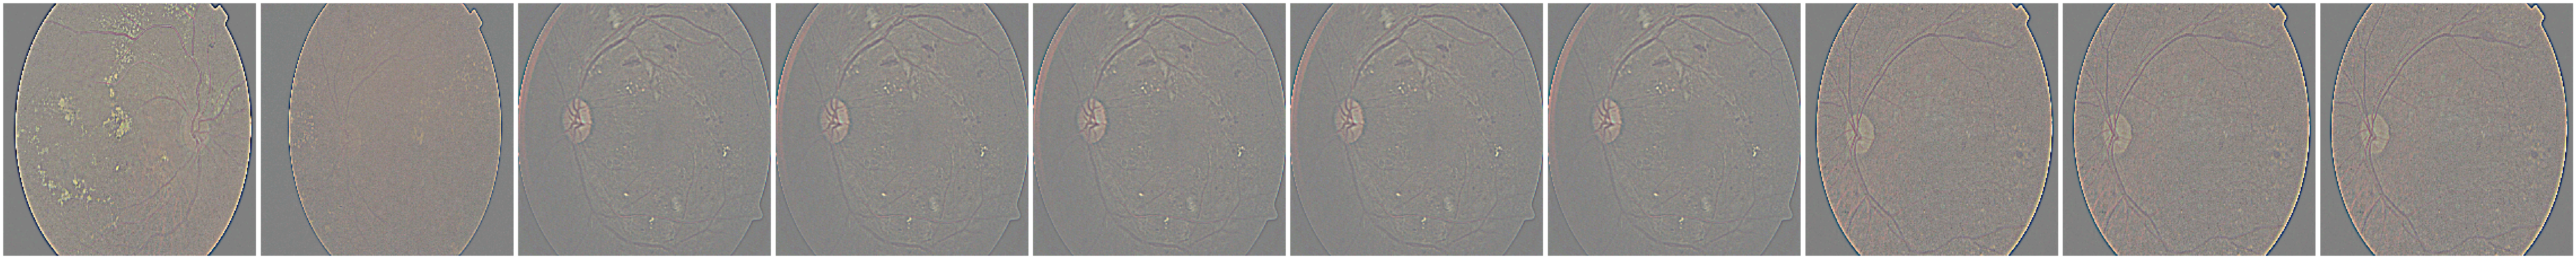

In [13]:
print("")
print("TRAINING DATA FOR Severe:")
print("")
images_details(Severe)
print("")
plot_images(Severe, 10)

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory(r'C:\Users\Admin\Pictures\Phase 2\dataset\train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 964 images belonging to 5 classes.


In [17]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory(r'C:\Users\Admin\Pictures\Phase 2\dataset\test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 964 images belonging to 5 classes.


In [18]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(5, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [20]:
epochs = 10
batch_size = 512

In [21]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1875 - loss: 1.6527
Epoch 1: accuracy improved from None to 0.18750, saving model to MANUAL.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.1875 - loss: 1.6527 - val_accuracy: 0.0938 - val_loss: 70.0776
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.1250 - loss: 63.7563
Epoch 2: accuracy did not improve from 0.18750
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1250 - loss: 63.7563 - val_accuracy: 0.4062 - val_loss: 27.7075
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.1562 - loss: 37.3837
Epoch 3: accuracy did not improve from 0.18750
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1562 - loss: 37.3837 - val_accuracy: 0.1250 - val_loss: 30.7106
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.1250 - loss: 29.1177
Epoch 4: accuracy did not improve from 0.18750
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1250 - loss: 29.1177 - val_accuracy: 0.2188 - val_loss: 23.3888
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.5000 - loss: 12.6236
Epoch 5: accuracy improved from 0.18750 to 0.50000, saving model

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 12.6236 - val_accuracy: 0.3438 - val_loss: 15.2860
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.1562 - loss: 18.9868
Epoch 6: accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1562 - loss: 18.9868 - val_accuracy: 0.2188 - val_loss: 19.4796
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.3125 - loss: 14.9518
Epoch 7: accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3125 - loss: 14.9518 - val_accuracy: 0.2188 - val_loss: 5.1835
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.2188 - loss: 3.9979
Epoch 8: accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2188 - loss: 3.9979 - val_accuracy: 0.1875 - val_loss: 6.4770
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.4375 - loss: 3.9414
Epoch 9: accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━

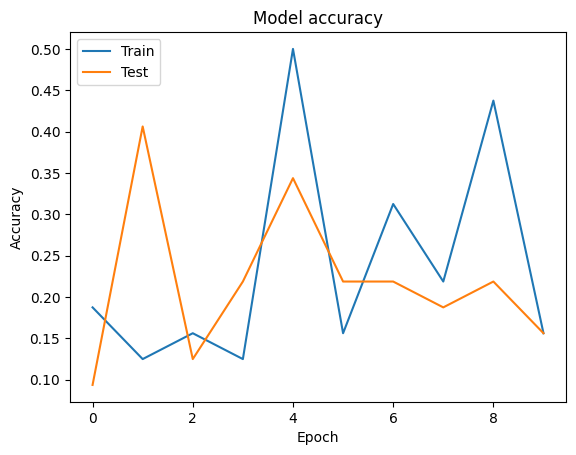

In [22]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

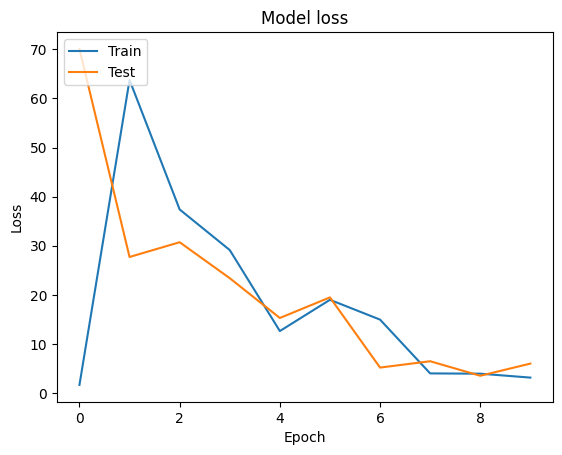

In [23]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()